# HW 1: Linear Algebra and Floating Point Arithmetic, (Part 1: Direct Methods for the solution of Linear Systems)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

np.random.seed(42)

In [2]:
def direct_method_pipeline(A, n):
    x_true = np.ones(n)
    y = np.dot(A, x_true)

    cond_2 = np.linalg.cond(A, p=2)
    cond_inf = np.linalg.cond(A, p=np.inf)

    x_computed = np.linalg.solve(A, y)

    relative_error = np.linalg.norm(x_computed - x_true, 2) / np.linalg.norm(x_true, 2)
    print(f"n: {n}")
    print(f"error: {relative_error:.2f}")
    print(f"condition numbers: {cond_2:.2f}, {cond_inf:.2f}\n")

    return cond_2, cond_inf, relative_error

## Testing the program

#### Random matrix

n: 10
error: 0.00
condition numbers: 61.48, 113.56

n: 20
error: 0.00
condition numbers: 563.24, 1350.87

n: 30
error: 0.00
condition numbers: 328.40, 727.07

n: 40
error: 0.00
condition numbers: 1000.82, 2566.19

n: 50
error: 0.00
condition numbers: 632.49, 1524.58

n: 60
error: 0.00
condition numbers: 19607.00, 52578.31

n: 70
error: 0.00
condition numbers: 7407.22, 21442.25

n: 80
error: 0.00
condition numbers: 1854.78, 5398.48

n: 90
error: 0.00
condition numbers: 3088.04, 7879.06

n: 100
error: 0.00
condition numbers: 1331.52, 3472.04



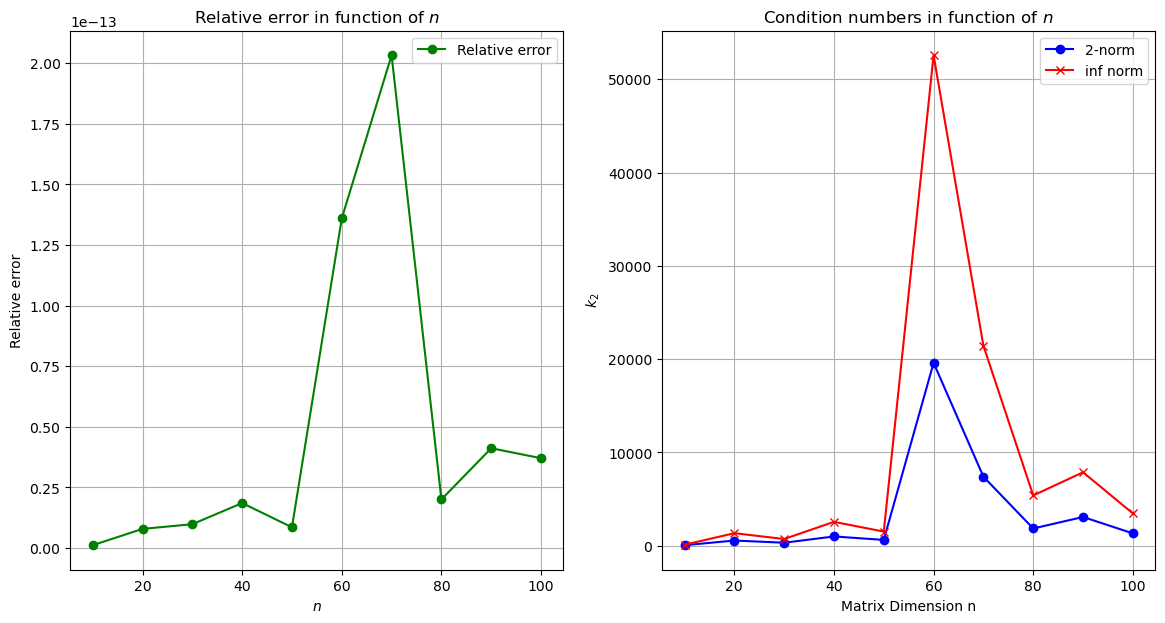

In [3]:
n_list = np.arange(10, 101, 10)
relative_errors = []
cond_2_s = []
cond_inf_s = []

for n in n_list :
    A = np.random.rand(n, n)
    cond_2, cond_inf, relative_error = direct_method_pipeline(A, n)
    cond_2_s.append(cond_2)
    cond_inf_s.append(cond_inf)
    relative_errors.append(relative_error)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.plot(n_list, relative_errors, 'go-', label='Relative error')
ax1.set_xlabel('$n$')
ax1.set_ylabel('Relative error')
ax1.set_title('Relative error in function of $n$')
ax1.legend()
ax1.grid(True)

ax2.plot(n_list, cond_2_s, 'bo-', label='2-norm')
ax2.plot(n_list, cond_inf_s, 'rx-', label='inf norm')
ax2.set_xlabel('Matrix Dimension n')
ax2.set_ylabel('$k_2$')
ax2.set_title('Condition numbers in function of $n$')
ax2.legend()
ax2.grid(True)

plt.show()

The condition number varies depending on the size of $n$, with the highest number being around $n$=60. Similarly, the error follows the same pattern of the condition number.

This rings true with the idea that the accuracy solution of a linear system is consistent with its condition number.

We can also see how the condition number starts smaller, and then grows higher the more we increase $n$.

#### Vandermonde matrix

n: 5
error: 0.00
condition numbers: 26169.69, 43736.00

n: 10
error: 0.00
condition numbers: 2106257536896.89, 3306440916776.01

n: 15
error: 42.55
condition numbers: 2582410766414958297088.00, 4364079977355646861312.00

n: 20
error: 684542.85
condition numbers: 460880184156581523357696.00, 1112147538172161371930624.00

n: 25
error: 6892.72
condition numbers: 20357822648091827765248.00, 63510613341374110498816.00

n: 30
error: 37889.74
condition numbers: 5098965862111818809344.00, 24729338003541211480064.00



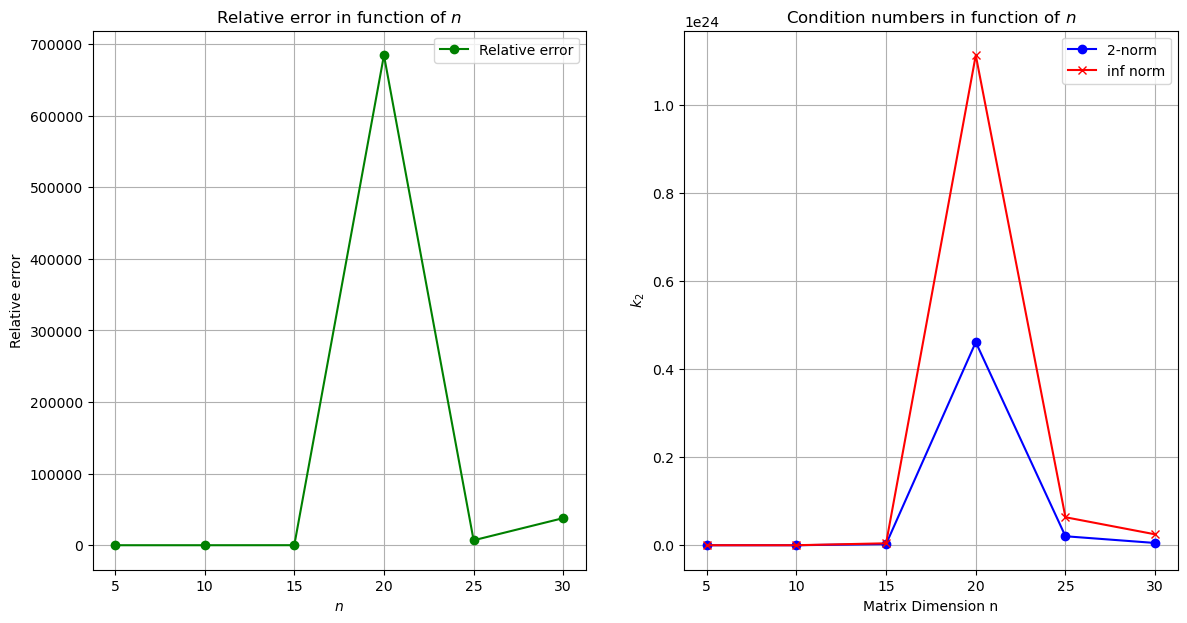

In [4]:
n_list = np.arange(5, 31, 5)
relative_errors = []
cond_2_s = []
cond_inf_s = []

for n in n_list :
    v = np.arange(1, n+1, 1)
    A = np.vander(v, n)
    cond_2, cond_inf, relative_error = direct_method_pipeline(A, n)
    cond_2_s.append(cond_2)
    cond_inf_s.append(cond_inf)
    relative_errors.append(relative_error)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.plot(n_list, relative_errors, 'go-', label='Relative error')
ax1.set_xlabel('$n$')
ax1.set_ylabel('Relative error')
ax1.set_title('Relative error in function of $n$')
ax1.legend()
ax1.grid(True)

ax2.plot(n_list, cond_2_s, 'bo-', label='2-norm')
ax2.plot(n_list, cond_inf_s, 'rx-', label='inf norm')
ax2.set_xlabel('Matrix Dimension n')
ax2.set_ylabel('$k_2$')
ax2.set_title('Condition numbers in function of $n$')
ax2.legend()
ax2.grid(True)

plt.show()

The Vandermonde matrix gives us a high condition number when $n$=20, meaning that the problem is indeed more ill-conditioned than the random matrix. The error is also much higher.
We can also see how the condition number starts smaller, and then grows higher the more we increase $n$.

#### Hilbert matrix

n: 4
error: 0.00
condition numbers: 15513.74, 28375.00

n: 5
error: 0.00
condition numbers: 476607.25, 943656.00

n: 6
error: 0.00
condition numbers: 14951058.64, 29070279.01

n: 7
error: 0.00
condition numbers: 475367356.88, 985194890.86

n: 8
error: 0.00
condition numbers: 15257575563.72, 33872792587.60

n: 9
error: 0.00
condition numbers: 493153322841.38, 1099652732973.80

n: 10
error: 0.00
condition numbers: 16024980732174.46, 35353994546522.04

n: 11
error: 0.00
condition numbers: 522478077916828.50, 1231074508396630.25

n: 12
error: 0.13
condition numbers: 16425917529444498.00, 40033385261309672.00



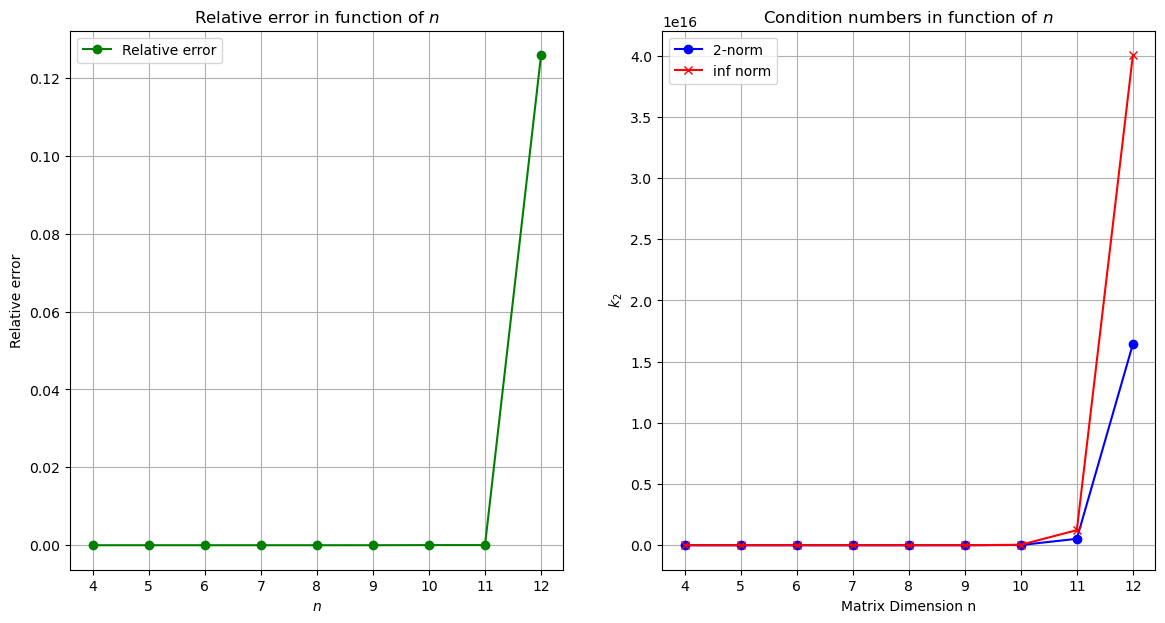

In [5]:
n_list = np.arange(4, 13, 1)
relative_errors = []
cond_2_s = []
cond_inf_s = []

for n in n_list :
    A = scipy.linalg.hilbert(n)
    cond_2, cond_inf, relative_error = direct_method_pipeline(A, n)
    cond_2_s.append(cond_2)
    cond_inf_s.append(cond_inf)
    relative_errors.append(relative_error)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.plot(n_list, relative_errors, 'go-', label='Relative error')
ax1.set_xlabel('$n$')
ax1.set_ylabel('Relative error')
ax1.set_title('Relative error in function of $n$')
ax1.legend()
ax1.grid(True)

ax2.plot(n_list, cond_2_s, 'bo-', label='2-norm')
ax2.plot(n_list, cond_inf_s, 'rx-', label='inf norm')
ax2.set_xlabel('Matrix Dimension n')
ax2.set_ylabel('$k_2$')
ax2.set_title('Condition numbers in function of $n$')
ax2.legend()
ax2.grid(True)

plt.show()

The Hilbert matrix is indeed ill-conditioned. We can see how the condition number gets really high really fast, even with a relatively small $n$.